## Data Loading and Initial Processing

The first step in our analysis involves loading data from a JSON file and organizing it into a structured format. We've extracted key details such as window ID, timestamp, duration, application, and title of events. Additionally, we've converted the timestamp to a datetime format for further analysis.

Let's delve into the loaded data:

In [67]:
import pandas as pd
import json
import seaborn as sns
from wordcloud import WordCloud

# Specify the path to your JSON file
file_path = './moredata.json'

# Read the JSON file into a dictionary
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract relevant information from the data
events = []
for window_id, window_data in data['buckets'].items():
    for event in window_data['events']:
        events.append({
            'window_id': window_id,
            'timestamp': event['timestamp'],
            'duration': event['duration'],
            'app': event['data']['app'] if 'app' in event['data'] else None,
            'title': event['data']['title'] if 'title' in event['data'] else None,
        })

# Create a DataFrame
df = pd.DataFrame(events)

# Convert timestamp to datetime using a custom function
def parse_timestamp(timestamp):
    try:
        return pd.to_datetime(timestamp)
    except ValueError:
        return pd.to_datetime(timestamp, format='%Y-%m-%dT%H:%M:%S.%f%z', errors='coerce')

df['timestamp'] = df['timestamp'].apply(parse_timestamp)

# Drop rows with missing values in 'timestamp'
df = df.dropna(subset=['timestamp'])

# Print the DataFrame
print(df)


                               window_id                        timestamp  \
0      aw-watcher-window_DESKTOP-MIACINH 2023-12-31 11:20:03.384000+00:00   
1      aw-watcher-window_DESKTOP-MIACINH 2023-12-31 11:19:59.316000+00:00   
2      aw-watcher-window_DESKTOP-MIACINH 2023-12-31 11:19:34.737000+00:00   
3      aw-watcher-window_DESKTOP-MIACINH 2023-12-31 11:18:54.914000+00:00   
4      aw-watcher-window_DESKTOP-MIACINH 2023-12-31 11:18:45.767000+00:00   
...                                  ...                              ...   
25496     aw-watcher-afk_DESKTOP-MIACINH 2023-12-14 22:23:03.338000+00:00   
25497     aw-watcher-afk_DESKTOP-MIACINH 2023-12-14 22:23:03.338000+00:00   
25498     aw-watcher-afk_DESKTOP-MIACINH 2023-12-14 22:23:03.338000+00:00   
25499     aw-watcher-afk_DESKTOP-MIACINH 2023-12-14 22:23:03.338000+00:00   
25500     aw-watcher-afk_DESKTOP-MIACINH 2023-12-14 22:16:58.154000+00:00   

       duration        app                                              tit


#### In the next step of our analysis, we took a closer look at the initial rows of the dataset using the df.head() function. This function allows us to inspect the first few rows of the DataFrame, providing a snapshot of the data's structure.

In [68]:
df.head()

,window_id,timestamp,duration,app,title
0,aw-watcher-window_DESKTOP-MIACINH,2023-12-31 11:20:03.384000+00:00,0.000,brave.exe,localhost:5600/#/activity/DESKTOP-MIACINH/view...
1,aw-watcher-window_DESKTOP-MIACINH,2023-12-31 11:19:59.316000+00:00,3.052,brave.exe,New Tab - Brave
2,aw-watcher-window_DESKTOP-MIACINH,2023-12-31 11:19:34.737000+00:00,23.563,brave.exe,NIS-Project(data from activity watch) - Brave
3,aw-watcher-window_DESKTOP-MIACINH,2023-12-31 11:18:54.914000+00:00,38.798,brave.exe,WordClouds with Python. A step-by-step guide t...
4,aw-watcher-window_DESKTOP-MIACINH,2023-12-31 11:18:45.767000+00:00,8.136,brave.exe,NIS-Project(data from activity watch) - Brave


### Removing Unnecessary Column

To streamline the dataset for our analysis, we decided to drop the 'window_id' column as it was deemed unnecessary for the current investigation. The drop function was used for this purpose.

In [69]:
df = df.drop(columns=['window_id'])

In [70]:
df.head()

,timestamp,duration,app,title
0,2023-12-31 11:20:03.384000+00:00,0.000,brave.exe,localhost:5600/#/activity/DESKTOP-MIACINH/view...
1,2023-12-31 11:19:59.316000+00:00,3.052,brave.exe,New Tab - Brave
2,2023-12-31 11:19:34.737000+00:00,23.563,brave.exe,NIS-Project(data from activity watch) - Brave
3,2023-12-31 11:18:54.914000+00:00,38.798,brave.exe,WordClouds with Python. A step-by-step guide t...
4,2023-12-31 11:18:45.767000+00:00,8.136,brave.exe,NIS-Project(data from activity watch) - Brave


In [71]:
df.tail(5)

,timestamp,duration,app,title
25496,2023-12-14 22:23:03.338000+00:00,188.961,None,None
25497,2023-12-14 22:23:03.338000+00:00,188.961,None,None
25498,2023-12-14 22:23:03.338000+00:00,188.962,None,None
25499,2023-12-14 22:23:03.338000+00:00,188.961,None,None
25500,2023-12-14 22:16:58.154000+00:00,365.199,None,None


In [72]:
rows_with_none = df[(df['app'].isna()) | (df['title'].isna())]
print("Rows with 'app' or 'title' as None:")
print(rows_with_none)

Rows with 'app' or 'title' as None:
                             timestamp   duration   app title
24581 2023-12-31 11:14:32.529000+00:00    331.008  None  None
24582 2023-12-30 21:11:09.317000+00:00  50603.211  None  None
24583 2023-12-30 21:11:09.317000+00:00  50603.211  None  None
24584 2023-12-30 20:59:03.794000+00:00    725.526  None  None
24585 2023-12-30 20:46:31.370000+00:00    752.423  None  None
...                                ...        ...   ...   ...
25496 2023-12-14 22:23:03.338000+00:00    188.961  None  None
25497 2023-12-14 22:23:03.338000+00:00    188.961  None  None
25498 2023-12-14 22:23:03.338000+00:00    188.962  None  None
25499 2023-12-14 22:23:03.338000+00:00    188.961  None  None
25500 2023-12-14 22:16:58.154000+00:00    365.199  None  None

[920 rows x 4 columns]


In [73]:
df = df.dropna(subset=['app', 'title'])
df

,timestamp,duration,app,title
0,2023-12-31 11:20:03.384000+00:00,0.000,brave.exe,localhost:5600/#/activity/DESKTOP-MIACINH/view...
1,2023-12-31 11:19:59.316000+00:00,3.052,brave.exe,New Tab - Brave
2,2023-12-31 11:19:34.737000+00:00,23.563,brave.exe,NIS-Project(data from activity watch) - Brave
3,2023-12-31 11:18:54.914000+00:00,38.798,brave.exe,WordClouds with Python. A step-by-step guide t...
4,2023-12-31 11:18:45.767000+00:00,8.136,brave.exe,NIS-Project(data from activity watch) - Brave
...,...,...,...,...
24576,2023-12-14 22:17:09.425000+00:00,3.192,explorer.exe,Program Manager
24577,2023-12-14 22:17:04.335000+00:00,4.079,SearchHost.exe,Search
24578,2023-12-14 22:17:03.294000+00:00,0.000,explorer.exe,Program Manager
24579,2023-12-14 22:16:59.257000+00:00,3.017,explorer.exe,


### Total Duration by Application

In order to understand the distribution of time spent on different applications, we performed a grouping operation on the DataFrame. The groupby function was utilized to group the data based on the 'app' column, and the sum of durations for each application was calculated using the 'duration' column. The results were then sorted in descending order.

In [74]:
total_duration_by_app = df.groupby('app')['duration'].sum().sort_values(ascending=False)
print(total_duration_by_app)


app
brave.exe                              200730.461
Code.exe                                64021.330
LockApp.exe                             44831.608
explorer.exe                            26670.198
ApplicationFrameHost.exe                 3583.501
WindowsTerminal.exe                      3366.645
WINWORD.EXE                              2251.388
opera.exe                                 731.853
OneDrive.exe                              342.365
SearchHost.exe                            267.140
POWERPNT.EXE                              226.987
vlc.exe                                   163.857
msedge.exe                                145.072
GitHubDesktop.exe                         137.725
msiexec.exe                               112.352
AvastUI.exe                                80.922
ShellExperienceHost.exe                    76.230
cmd.exe                                    24.422
wordpad.exe                                15.331
SnippingTool.exe                            9.

"This analysis provides insights into the overall usage pattern, highlighting the applications with the highest cumulative time spent. The sorted list allows for easy identification of the most time-consuming applications in the dataset."

### Event Counts by Application

To gain insights into the frequency of events for each application, we used the value_counts function on the 'app' column. Subsequently, a bar plot was generated to visually represent the distribution of events across different applications.

app
brave.exe                              11781
Code.exe                                9102
explorer.exe                            3008
WindowsTerminal.exe                      274
SearchHost.exe                           120
LockApp.exe                               80
opera.exe                                 50
ApplicationFrameHost.exe                  39
ShellExperienceHost.exe                   23
POWERPNT.EXE                              20
WINWORD.EXE                               19
msedge.exe                                15
vlc.exe                                    7
GitHubDesktop.exe                          7
SnippingTool.exe                           7
AvastUI.exe                                6
cmd.exe                                    3
OneDrive.exe                               3
StartMenuExperienceHost.exe                3
msiexec.exe                                2
ScreenClippingHost.exe                     2
wordpad.exe                                2
Picker

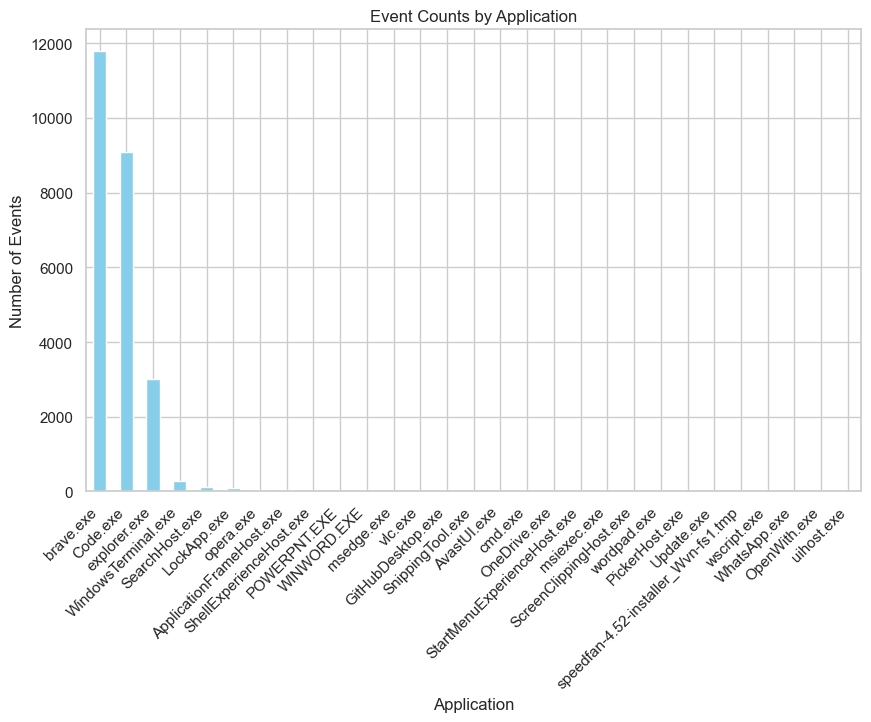

In [94]:
import matplotlib.pyplot as plt
events_by_app = df['app'].value_counts()
print(events_by_app)


# Plot a bar chart for visualization
plt.figure(figsize=(10, 6))
events_by_app.plot(kind='bar', color='skyblue')
plt.title('Event Counts by Application')
plt.xlabel('Application')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.show()

##### This visualization helps in understanding the relative activity levels across various applications, providing a quick overview of the applications with the highest and lowest event counts.

### Average Event Duration by Application

To analyze the average duration of events for each application, we utilized the groupby function on the 'app' column, followed by the mean function on the 'duration' column. The results were then sorted in descending order to identify applications with longer average event durations.

In [77]:
avg_duration_by_app = df.groupby('app')['duration'].mean().sort_values(ascending=False)
print(avg_duration_by_app)


app
LockApp.exe                            560.395100
WINWORD.EXE                            118.494105
OneDrive.exe                           114.121667
ApplicationFrameHost.exe                91.884641
msiexec.exe                             56.176000
vlc.exe                                 23.408143
GitHubDesktop.exe                       19.675000
brave.exe                               17.038491
opera.exe                               14.637060
AvastUI.exe                             13.487000
WindowsTerminal.exe                     12.287026
POWERPNT.EXE                            11.349350
msedge.exe                               9.671467
explorer.exe                             8.866422
cmd.exe                                  8.140667
wordpad.exe                              7.665500
Code.exe                                 7.033765
Update.exe                               6.097000
uihost.exe                               6.050000
ScreenClippingHost.exe                   4.091

##### This analysis provides insights into the typical duration of events associated with different applications. Applications with longer average event durations may indicate more prolonged or resource-intensive activities.

### Event Count Over Time

To understand the distribution of events over time, we set the 'timestamp' column as the index and used the resample function to aggregate events on a daily basis. The result is a time series representing the count of events for each day.

In [78]:
df.set_index('timestamp', inplace=True)
events_over_time = df.resample('D').size()
print(events_over_time)


timestamp
2023-12-14 00:00:00+00:00      65
2023-12-15 00:00:00+00:00     495
2023-12-16 00:00:00+00:00     933
2023-12-17 00:00:00+00:00    1304
2023-12-18 00:00:00+00:00     389
2023-12-19 00:00:00+00:00     472
2023-12-20 00:00:00+00:00      23
2023-12-21 00:00:00+00:00     648
2023-12-22 00:00:00+00:00    2048
2023-12-23 00:00:00+00:00    2034
2023-12-24 00:00:00+00:00    2471
2023-12-25 00:00:00+00:00    2368
2023-12-26 00:00:00+00:00    1984
2023-12-27 00:00:00+00:00    1810
2023-12-28 00:00:00+00:00    4411
2023-12-29 00:00:00+00:00    2118
2023-12-30 00:00:00+00:00     979
2023-12-31 00:00:00+00:00      29
Freq: D, dtype: int64


##### This time series can be visualized to observe trends or patterns in event occurrence over different days. It provides a broader perspective on the overall activity level within the specified time range.



### Total Duration Over Time

To analyze the total duration of events over time, we utilized the resample function to aggregate the 'duration' column on a daily basis. The resulting time series provides insights into the cumulative duration of events for each dayoime period.

In [79]:
total_duration_over_time = df.resample('D')['duration'].sum()
print(total_duration_over_time)


timestamp
2023-12-14 00:00:00+00:00     6281.130
2023-12-15 00:00:00+00:00     9230.852
2023-12-16 00:00:00+00:00    17150.222
2023-12-17 00:00:00+00:00    38515.407
2023-12-18 00:00:00+00:00    14651.868
2023-12-19 00:00:00+00:00    30669.268
2023-12-20 00:00:00+00:00     2770.915
2023-12-21 00:00:00+00:00    16775.312
2023-12-22 00:00:00+00:00    26102.481
2023-12-23 00:00:00+00:00    22098.399
2023-12-24 00:00:00+00:00    18014.993
2023-12-25 00:00:00+00:00    26798.544
2023-12-26 00:00:00+00:00    25637.073
2023-12-27 00:00:00+00:00    13652.615
2023-12-28 00:00:00+00:00    29792.848
2023-12-29 00:00:00+00:00    17742.602
2023-12-30 00:00:00+00:00    31628.446
2023-12-31 00:00:00+00:00      307.151
Freq: D, Name: duration, dtype: float64


##### This information is valuable for understanding the overall time spent on various activities across different days. Visualizing this time series can reveal patterns or anomalies in the usage patterns over the specified time period.

###  Exploratory Data Analysis (EDA) Visualizations

We generated a set of visualizations to perform exploratory data analysis (EDA) on the provided dataset. Each plot serves a specific purpose in understanding different aspects of the data.

#### 1. Total Duration by App:
   - This bar chart illustrates the total duration spent on each application.
   - X-axis: App names
   - Y-axis: Total duration in seconds

#### 2. Number of Events by App:
   - This bar chart shows the count of events for each application.
   - X-axis: App names
   - Y-axis: Number of events

#### 3. Average Duration by App:
   - This bar chart represents the average duration of events for each application.
   - X-axis: App names
   - Y-axis: Average duration in seconds

#### 4. Events Over Time:
   - This line plot depicts the number of events over time (daily frequency).
   - X-axis: Date
   - Y-axis: Number of events

#### 5. Total Duration Over Time:
   - This line plot visualizes the total duration of events over time (daily frequency).
   - X-axis: Date
   - Y-axis: Total duration in seconds

The visualizations offer insights into patterns, trends, and distributions within the dataset. These insights are crucial for further analysis and decision-making.
analysis and decision-making.

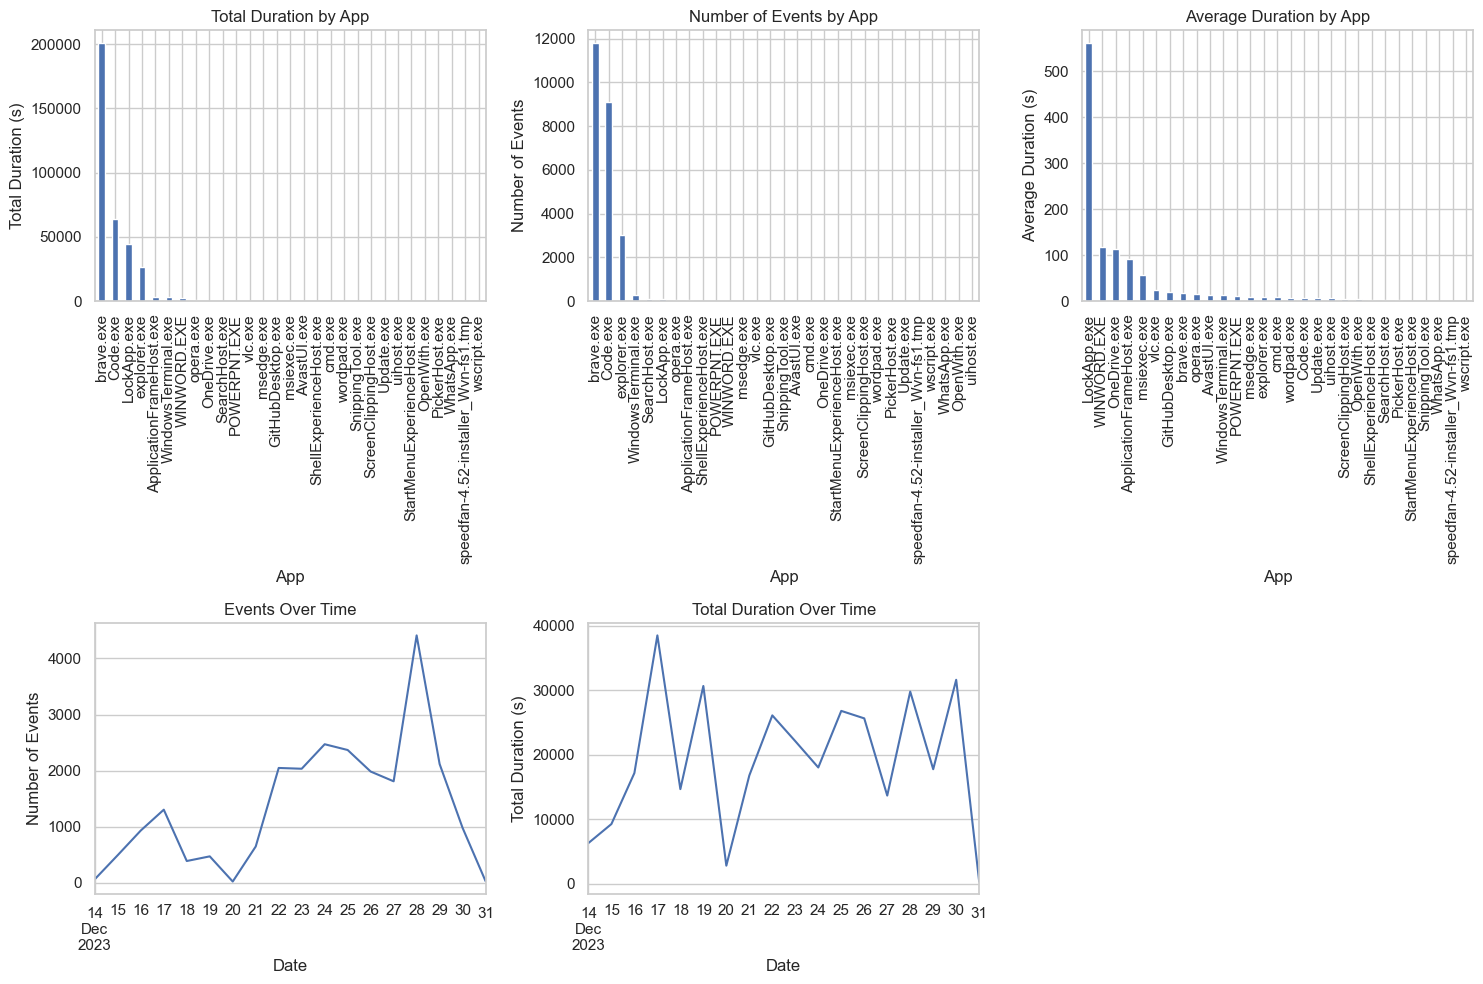

In [80]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
total_duration_by_app.plot(kind='bar')
plt.title('Total Duration by App')
plt.xlabel('App')
plt.ylabel('Total Duration (s)')

# Plot 2: Number of Events by App
plt.subplot(2, 3, 2)
events_by_app.plot(kind='bar')
plt.title('Number of Events by App')
plt.xlabel('App')
plt.ylabel('Number of Events')

# Plot 3: Average Duration by App
plt.subplot(2, 3, 3)
avg_duration_by_app.plot(kind='bar')
plt.title('Average Duration by App')
plt.xlabel('App')
plt.ylabel('Average Duration (s)')

# Plot 4: Events Over Time
plt.subplot(2, 3, 4)
events_over_time.plot()
plt.title('Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')

# Plot 5: Total Duration Over Time
plt.subplot(2, 3, 5)
total_duration_over_time.plot()
plt.title('Total Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Total Duration (s)')

plt.tight_layout()
plt.show()

### Top N Apps by Total Duration

We created a bar chart to highlight the to *5* N applications based on their total duration. This visualization helps identify the applications consuming the most time.

#### Top N Apps by Total Duration:
   - This bar chart displays the top N applications with the highest total duration.
   - X-axis: App names
   - Y-axis: Total duration in seconds
   - Color: ific apps.

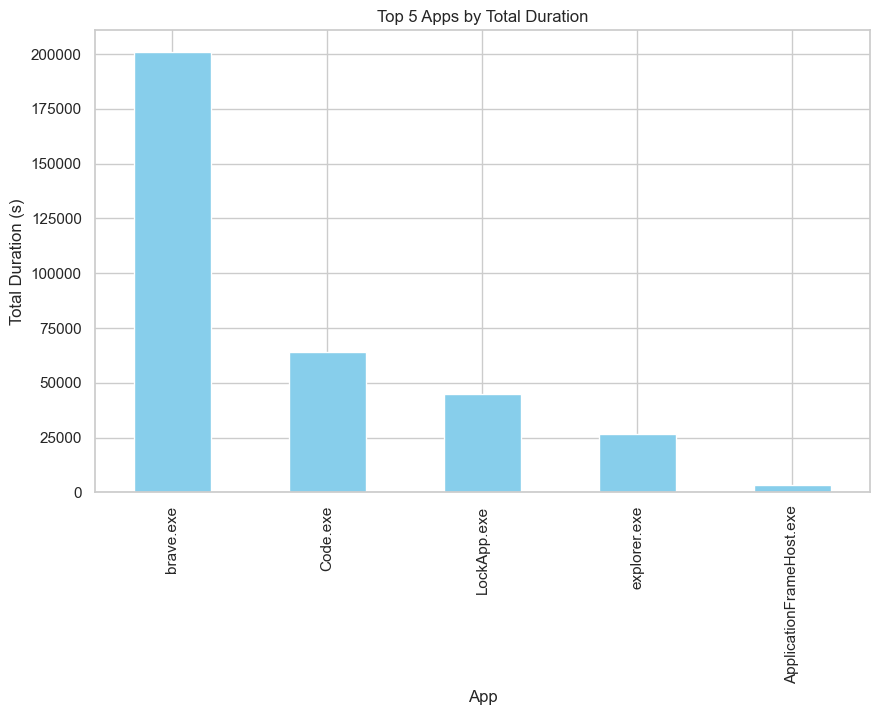

In [81]:
top_n = 5
top_apps = df.groupby('app')['duration'].sum().nlargest(top_n)
plt.figure(figsize=(10, 6))
top_apps.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Apps by Total Duration')
plt.xlabel('App')
plt.ylabel('Total Duration (s)')
plt.show()

##### 
The chart provides a focused view of the most time-consuming applications, aiding in prioritizing analysis or attention to specific apps.

### Report: Distribution of Event Durations

We generated a histogram to visualize the distribution of event durations in the dataset. This type of chart provides insights into the spread and concentration of event durations.

#### Distribution of Event Durations:
   - This histogram illustrates the frequency distribution of event durations.
   - X-axis: Event duration in seconds
   - Y-axis: Frequency of events
   - KDE (Kernel Density Estimate): Smooth line representing the estimated probability density fue dataset.


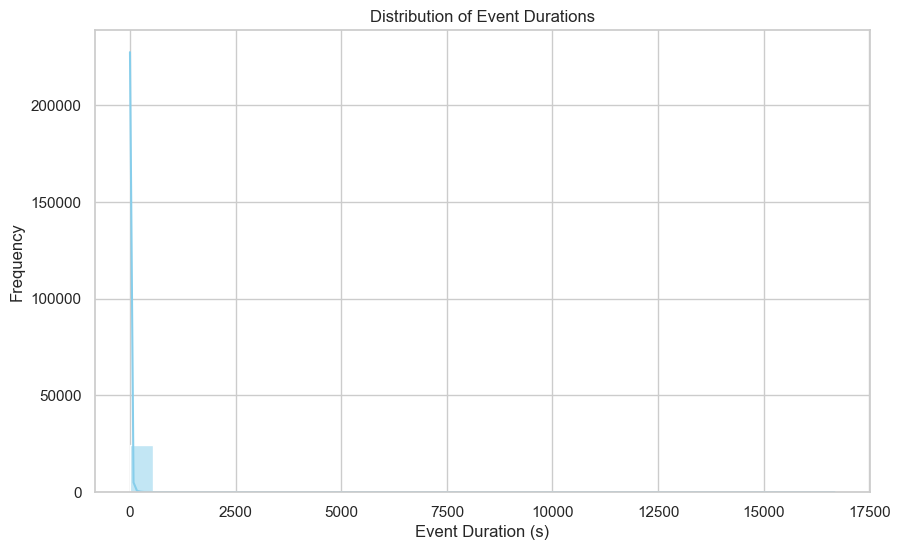

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Event Durations')
plt.xlabel('Event Duration (s)')
plt.ylabel('Frequency')
plt.show()



##### Analyzing the distribution can reveal patterns such as common event durations or outliers in the dataset.

### Report: Top 10 Titles by Event Frequency

We created a bar chart to identify the top 10 titles with the highest event frequency in the dataset. This analysis helps us understand which activities or applications are most frequently used.

#### Top 10 Titles by Event Frequency:
   - This bar chart displays the titles of events ranked by their frequency.
   - X-axis: Title of the event
   - Y-axis: Frequency of the  dataset.


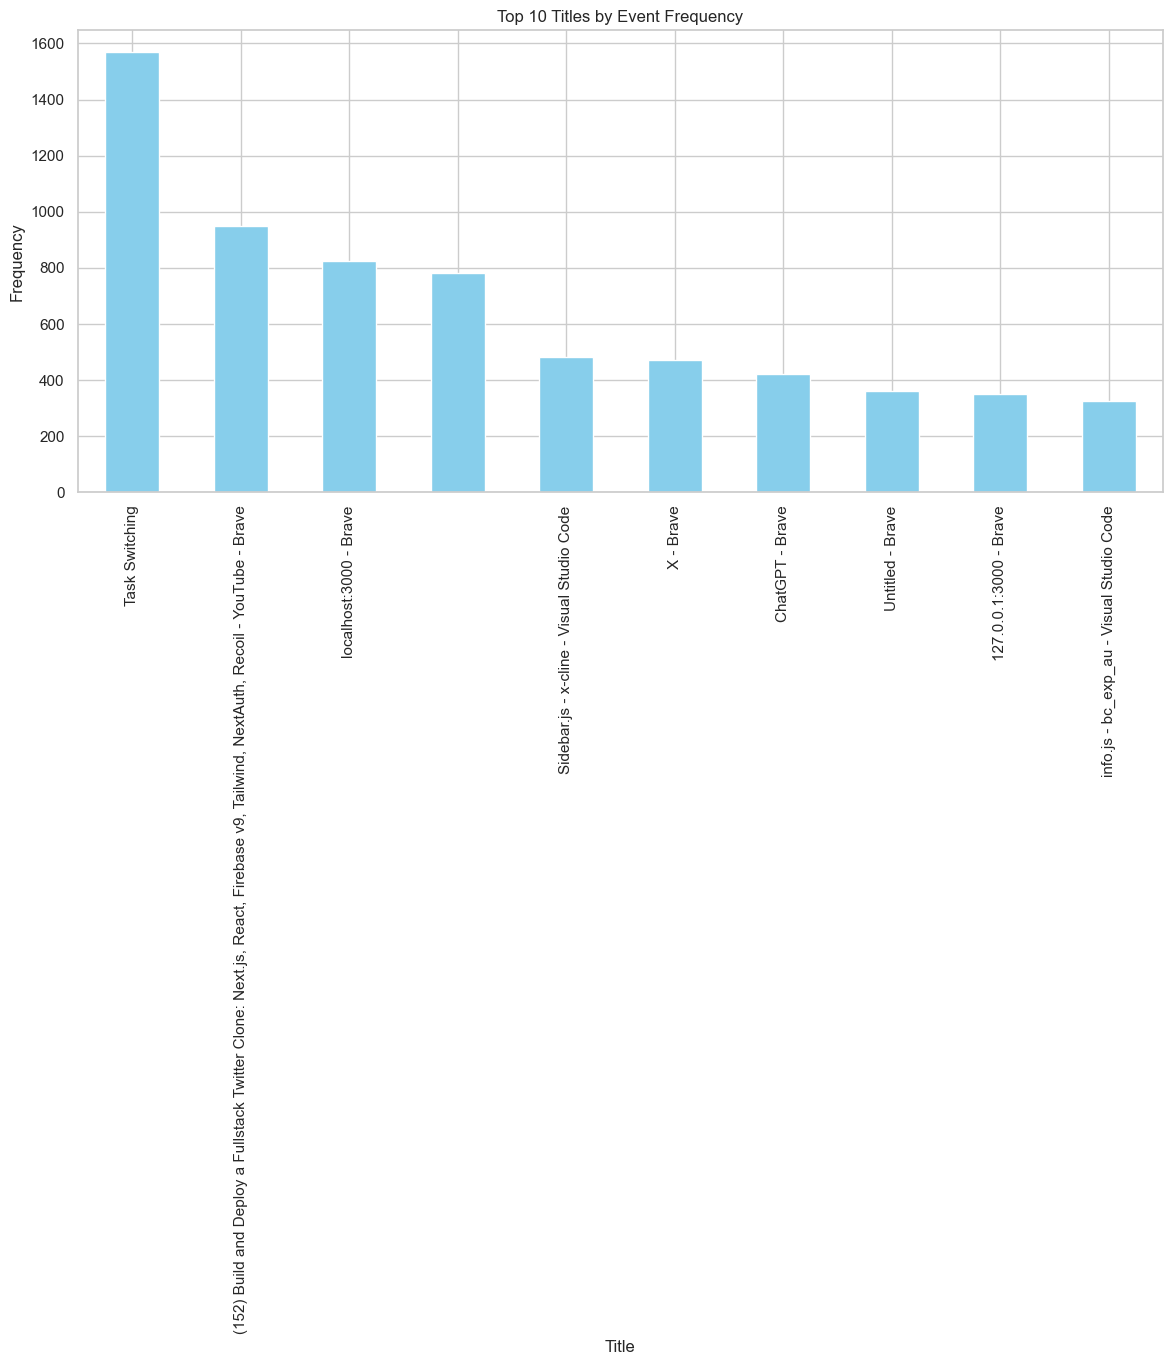

In [83]:

plt.figure(figsize=(14, 6))
title_counts = df['title'].value_counts().nlargest(10)
title_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Titles by Event Frequency')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.show()

##### Analyzing this chart provides insights into the most commonly used titles and activities recorded in the dataset.

### Report: Event Frequency by Hour of Day

To understand the distribution of event occurrences throughout the day, we created a bar chart illustrating the frequency of events at different hours.

#### Event Frequency by Hour of Day:
   - This bar chart depicts the distribution of event occurrences across different hours of the day.
   - X-axis: Hour of the day
   - Y-axis: Frequency of eak hours.


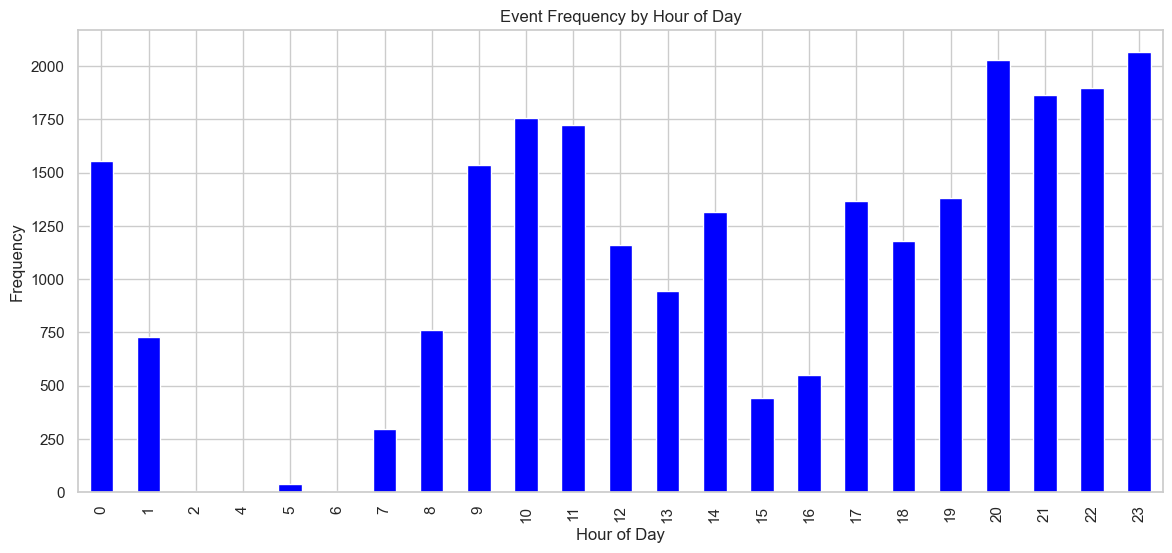

In [84]:
df.index = pd.to_datetime(df.index)

# Create 'hour' column
df['hour'] = df.index.hour

# Plot
plt.figure(figsize=(14, 6))
hourly_counts = df.groupby('hour').size()
hourly_counts.plot(kind='bar', color='blue')
plt.title('Event Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

##### Analyzing this chart provides insights into the pattern of activities and events over the course of 24 hours, helping identify peak and off-peak hours.

### Report: Event Frequency by Day of Week

We conducted an analysis to understand the distribution of event occurrences across different days of the week. The bar chart below illustrates the frequency of events for each day of the week.

#### Event Frequency by Day of Week:
   - The bar chart provides insights into how events are distributed throughout the week.
   - X-axis: Day of the week (Monday to Sunday)
   - Y-axis: Frequency of e trends.


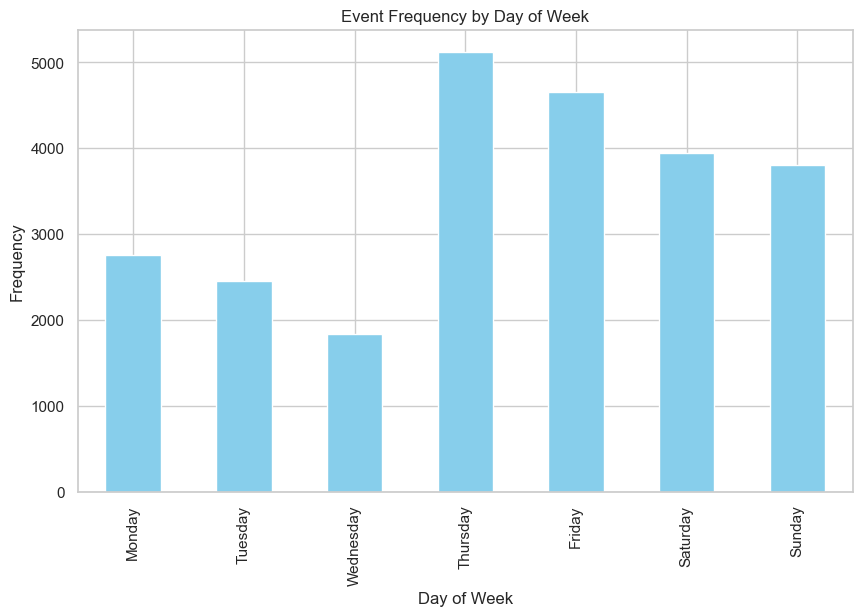

In [85]:
df.index = pd.to_datetime(df.index)


df['day_of_week'] = df.index.day_name()
plt.figure(figsize=(10, 6))
day_of_week_counts = df['day_of_week'].value_counts()
day_of_week_counts = day_of_week_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Event Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

##### Analyzing this chart allows us to identify any patterns or variations in event frequency based on weekdays, helping to understand weekly activity trends.


### Report: Event Duration Distribution by App

We conducted an analysis to visualize the distribution of event durations across different applications. The boxplot below provides insights into the spread of event durations for each application.

#### Event Duration Boxplot by App:
   - The boxplot depicts the distribution of event durations, including median, quartiles, and potential outliers, for each application.
   - X-axis: Application
   - Y-axis: Event Duration (secrations.


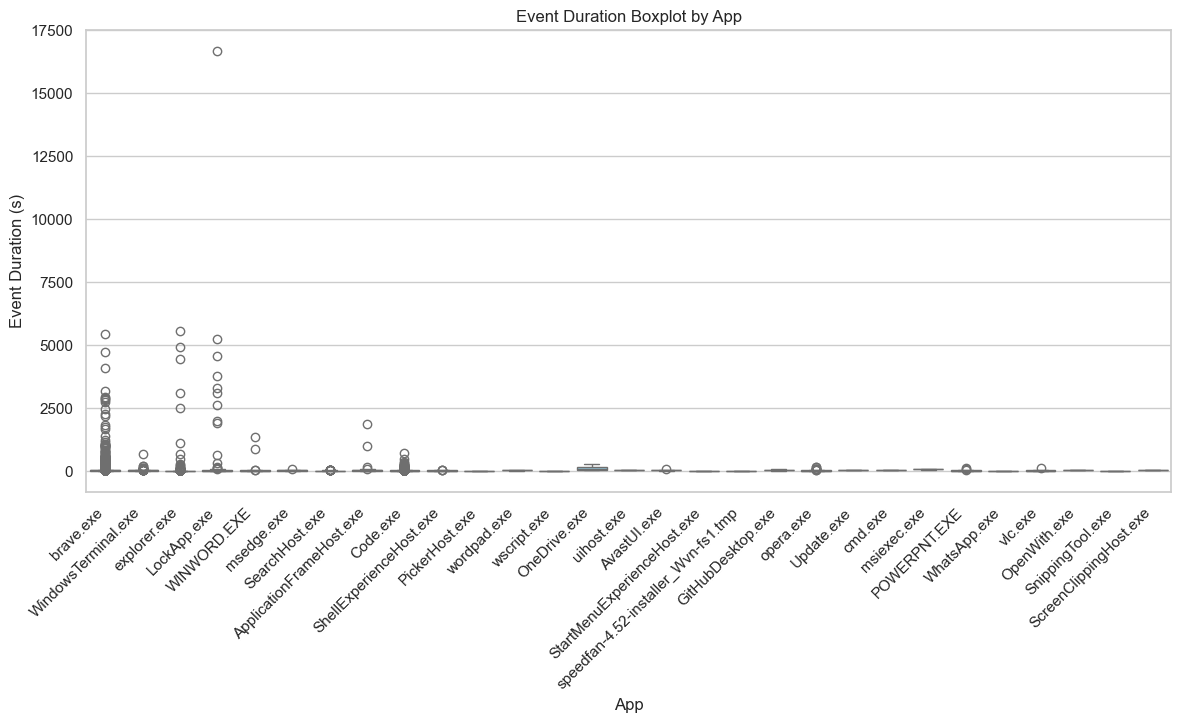

In [86]:

plt.figure(figsize=(14, 6))
sns.boxplot(x='app', y='duration', data=df, color='skyblue')
plt.title('Event Duration Boxplot by App')
plt.xlabel('App')
plt.ylabel('Event Duration (s)')
plt.xticks(rotation=45, ha='right')
plt.show()


##### This visualization helps in understanding the variability in event durations across various applications, identifying potential outliers, and gaining insights into the overall distribution of event durations.


### Report: Correlation Between Event Duration and Timestamp

In this analysis, we explored the correlation between event durations and their corresponding timestamps. The scatter plot below illustrates the relationship between the duration of events and their respective timestamps.

#### Correlation Between Duration and Timestamp:
   - Each point on the scatter plot represents an event, with the x-coordinate denoting the timestamp and the y-coordinate representing the event duration.
   - The scatter plot helps visualize patterns or trends in event durations over th time.


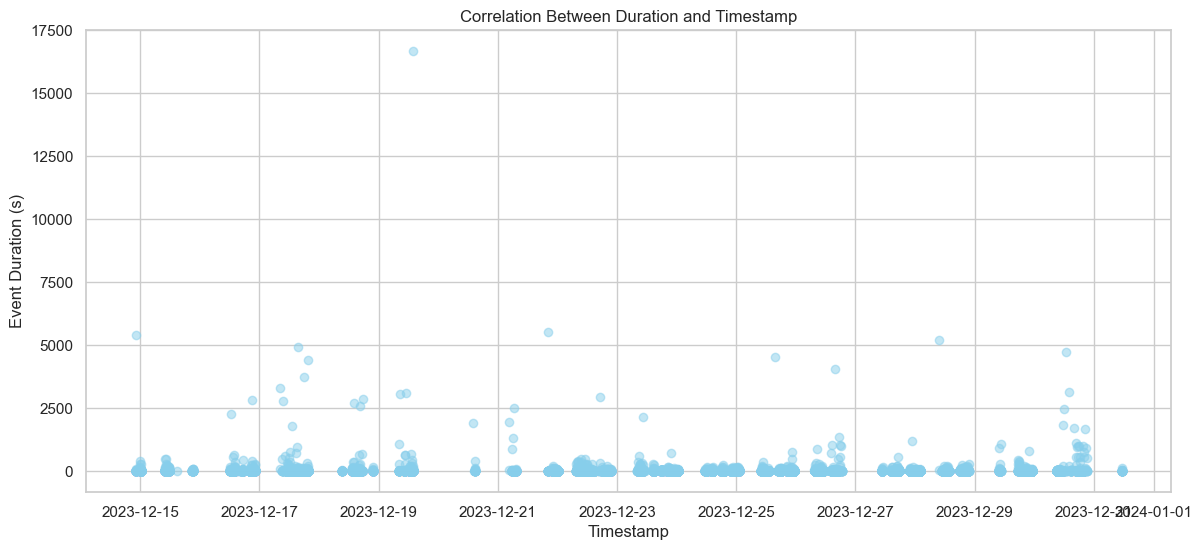

In [87]:
plt.figure(figsize=(14, 6))
plt.scatter(df.index, df['duration'], color='skyblue', alpha=0.5)
plt.title('Correlation Between Duration and Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Event Duration (s)')
plt.show()

##### This visualization aids in understanding any temporal correlations or patterns in the duration of events, potentially revealing insights into how event durations change with time.


### Report: Word Cloud of Event Titles

In this analysis, we created a word cloud based on the titles of events. The word cloud provides a visual representation of the most frequent words in event titles, with larger words indicating higher frequency.

#### Word Cloud:
   - The generated word cloud illustrates the distribution of words in event titles.
   - Larger and bolder words are more frequent in the dataset, while smaller words appear less frequenevents.


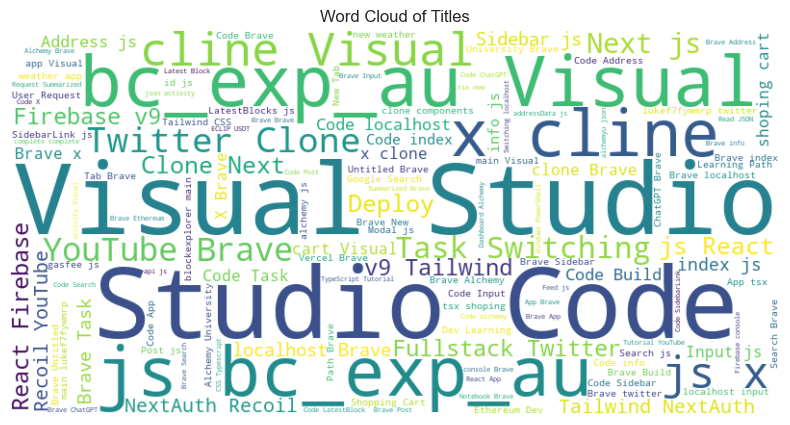

In [88]:
text = ' '.join(df['title'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

##### This visualization is useful for identifying common themes or recurring keywords in event titles, offering insights into the nature of recorded events.


# Report: Anomaly Detection Using Isolation Forest

In this section, we applied anomaly detection using the Isolation Forest algorithm to identify unusual patterns or outliers in the dataset. Anomalies could represent events or behaviors that deviate significantly from the norm.

## Isolation Forest:

- We used the Isolation Forest algorithm, a machine learning model suitable for detecting anomalies in high-dimensional datasets.
- The model is trained on features such as the timestamp and duration of events.

## Anomaly Detection Results:

- Anomalies were identified based on the Isolation Forest predictions.
- The 'anomaly' column in the dataset indicates whether each event is considered normal (1) or an anomaly (-1).

## Next Steps:

- Further analysis or investigation can be performed on the identified anomalies to understand their nature and potential reasons for deviation.
- Visualization or statistical summaries may provide additional insights into the anomalous events.

**Note:**

- Model parameters, such as the contamination rate, can be adjusted to fine-tune the sensitivity of anomaly detection based on the characteristics of your dataset.
f your dataset.


In [89]:
from sklearn.ensemble import IsolationForest

# Feature engineering: convert timestamp to numeric value for IsolationForest
df['timestamp_numeric'] = (df.index - pd.Timestamp("1970-01-01", tz="UTC")).total_seconds()

# Extract relevant features for anomaly detection
features = ['timestamp_numeric', 'duration']

# Create a feature matrix
X = df[features]

# Fit IsolationForest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your data
model.fit(X)

# Predict anomalies (1 for normal, -1 for anomaly)
df['anomaly'] = model.predict(X)

# Filter out anomalies
anomalies = df[df['anomaly'] == -1]

# Print or analyze the anomalies
print(anomalies)


                                  duration                  app  \
timestamp                                                         
2023-12-31 11:19:34.737000+00:00    23.563            brave.exe   
2023-12-31 11:18:54.914000+00:00    38.798            brave.exe   
2023-12-31 11:18:23.283000+00:00    19.394            brave.exe   
2023-12-31 11:16:08.655000+00:00   109.073            brave.exe   
2023-12-31 11:14:45.273000+00:00    48.239  WindowsTerminal.exe   
...                                    ...                  ...   
2023-12-14 22:17:09.425000+00:00     3.192         explorer.exe   
2023-12-14 22:17:04.335000+00:00     4.079       SearchHost.exe   
2023-12-14 22:17:03.294000+00:00     0.000         explorer.exe   
2023-12-14 22:16:59.257000+00:00     3.017         explorer.exe   
2023-12-14 22:16:58.244000+00:00     0.000            brave.exe   

                                                                              title  \
timestamp                                

### Visualizing Anomalies Detected by Isolation Forest

In this section, we visualized the anomalies detected by the Isolation Forest algorithm. Anomalies are represented by distinct colors in the scatter plot based on the 'anomaly' predictions.

#### Scatter Plot:
   - The x-axis represents the timestamp of events.
   - The y-axis represents the duration of events.
   - Anomalies are highlighted with different colors using the 'viridis' color map.

#### Interpretation:
   - Points with colors other than the normal color indicate potential anomalies.
   - Investigate events corresponding to these anomalies to understand their characfor refinement.


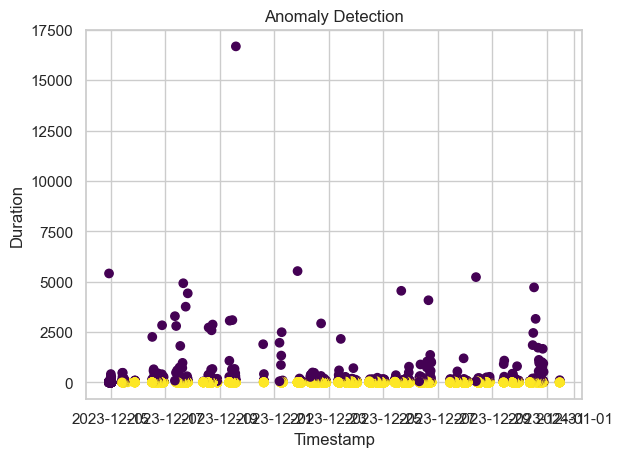

In [90]:
plt.scatter(df.index, df['duration'], c=df['anomaly'], cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Duration')
plt.title('Anomaly Detection')
plt.show()

#### The "anomaly" column in the DataFrame df contains the results of the anomaly detection, where the values indicate whether each event is considered normal (1) or an anomaly (-1). To display the "anomaly" column, you can use the following code:

In [91]:
df["anomaly"]

timestamp
2023-12-31 11:20:03.384000+00:00    1
2023-12-31 11:19:59.316000+00:00    1
2023-12-31 11:19:34.737000+00:00   -1
2023-12-31 11:18:54.914000+00:00   -1
2023-12-31 11:18:45.767000+00:00    1
                                   ..
2023-12-14 22:17:09.425000+00:00   -1
2023-12-14 22:17:04.335000+00:00   -1
2023-12-14 22:17:03.294000+00:00   -1
2023-12-14 22:16:59.257000+00:00   -1
2023-12-14 22:16:58.244000+00:00   -1
Name: anomaly, Length: 24581, dtype: int32

##### This code calculates and prints the number of anomalies in the "anomaly" column of the DataFrame df. The result is the count of events marked as anomalies (-1).

In [92]:
anomaly_count = df['anomaly'].value_counts().get(-1, 0)

# Print the count
print("Number of anomalies:", anomaly_count)

Number of anomalies: 1229


### Anomaly Analysis by Title

In this section, we explore the anomalies detected in the dataset based on titles. The analysis includes visualizations of the top 10 and bottom 10 anomalies.

#### Top 10 Anomalies by Title


The bar chart above represents the top 10 anomalies based on titles. Each bar corresponds to a title, and the height of the bar indicates the frequency of anomalies associated with that title.

#### Bottom 10 Anomalies by Title



On the other hand, the bar chart above illustrates the bottom 10 anomalies by title. Similar to the top 10 chart, the height of each bar corresponds to the frequency of anomalies for a specific title.

in the dataset.
ts.


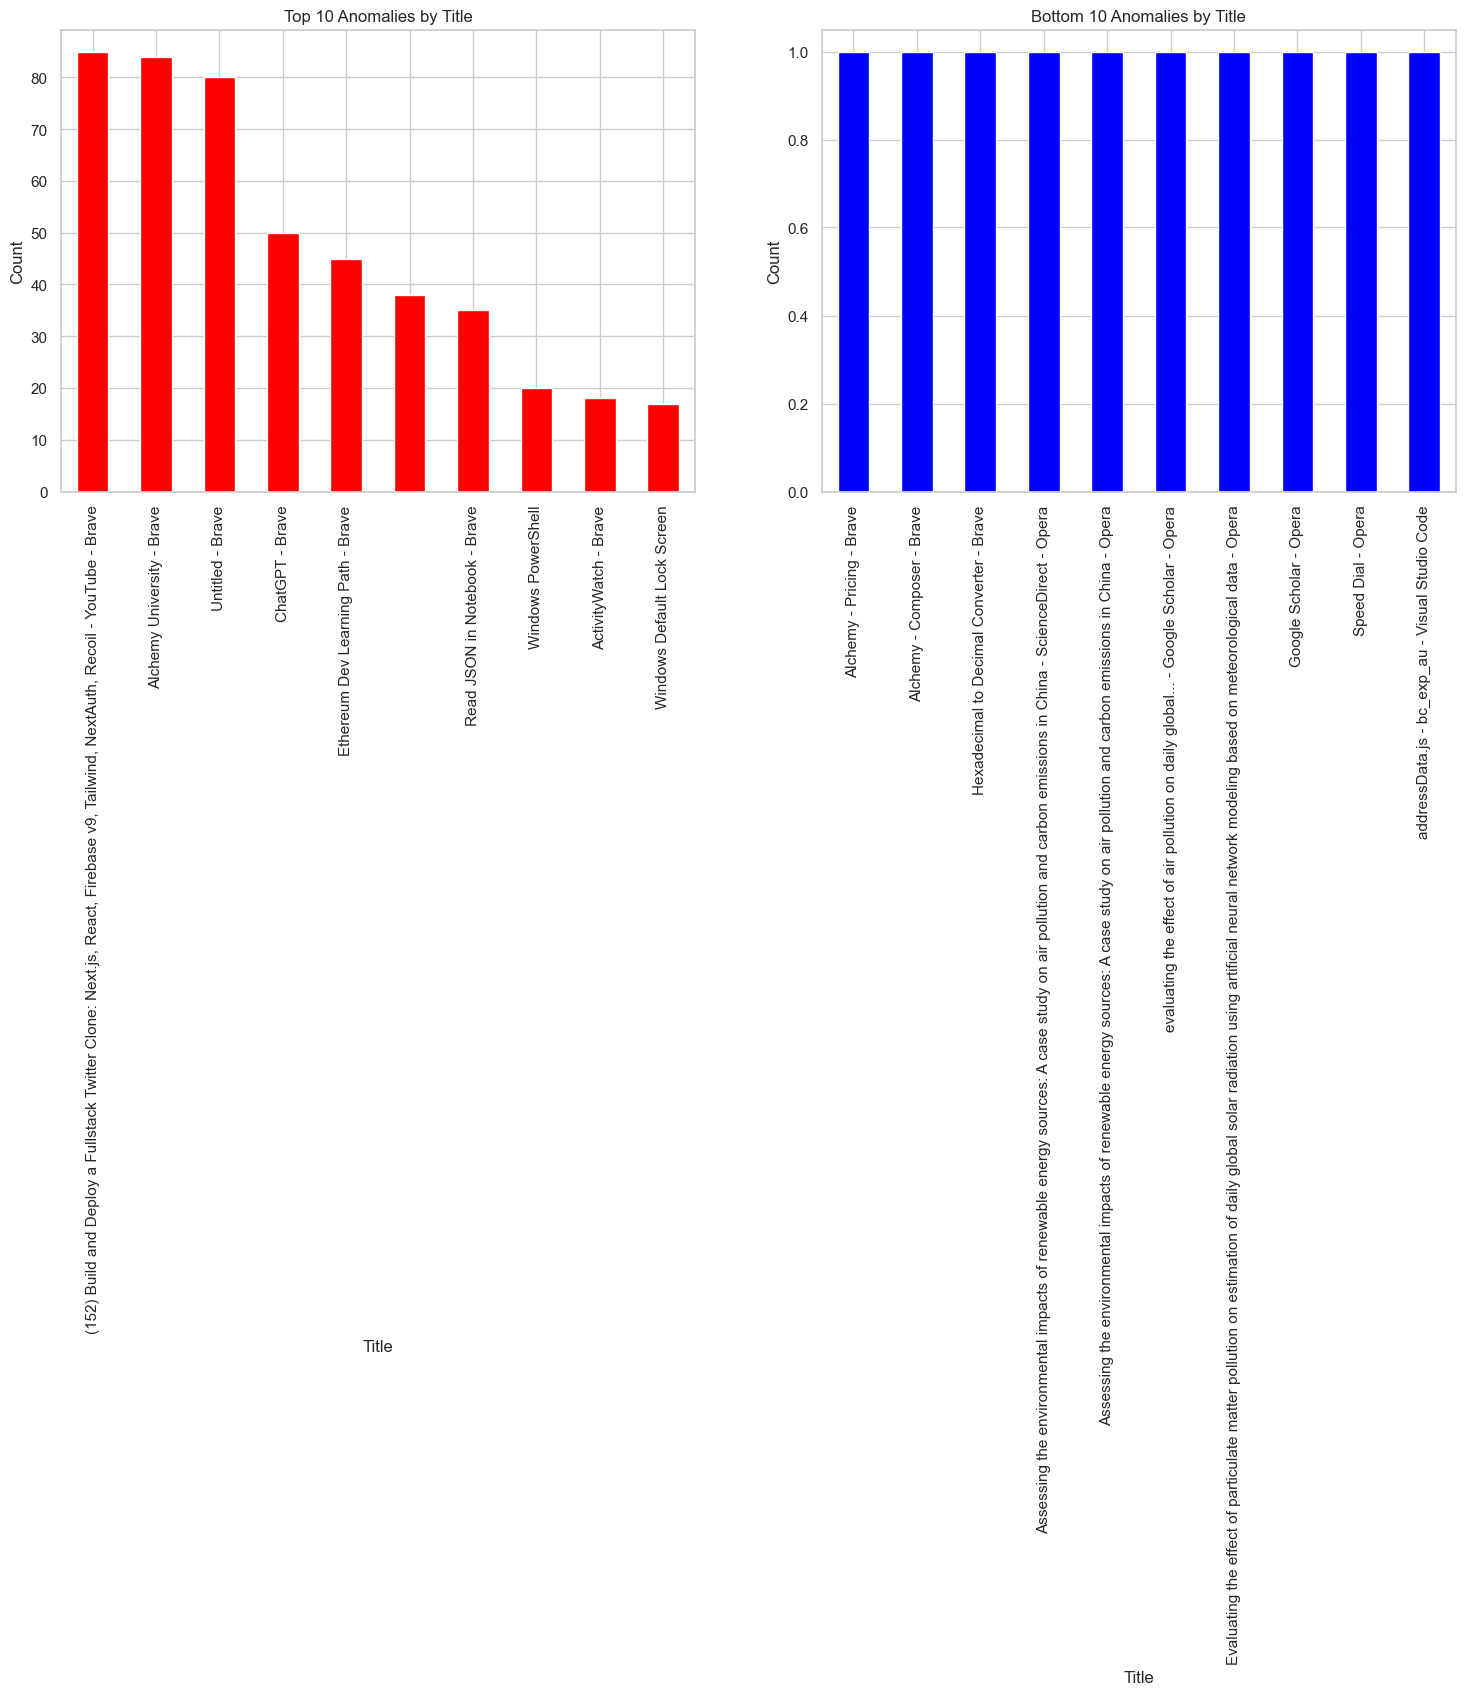

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract anomalies
anomalies = df[df['anomaly'] == -1]

# Get the top 10 and bottom 10 anomalies based on the title
top_anomalies_by_title = anomalies['title'].value_counts().nlargest(10)
bottom_anomalies_by_title = anomalies['title'].value_counts().nsmallest(10)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the top 10 anomalies by title
top_anomalies_by_title.plot(kind='bar', color='red', ax=axes[0])
axes[0].set_title('Top 10 Anomalies by Title')
axes[0].set_xlabel('Title')
axes[0].set_ylabel('Count')

# Plot the bottom 10 anomalies by title
bottom_anomalies_by_title.plot(kind='bar', color='blue', ax=axes[1])
axes[1].set_title('Bottom 10 Anomalies by Title')
axes[1].set_xlabel('Title')
axes[1].set_ylabel('Count')

plt.show()


### Anomaly Analysis by App

In this section, we analyze anomalies based on the associated applications. The bar chart below visualizes the occurrences of anomalies for each app.


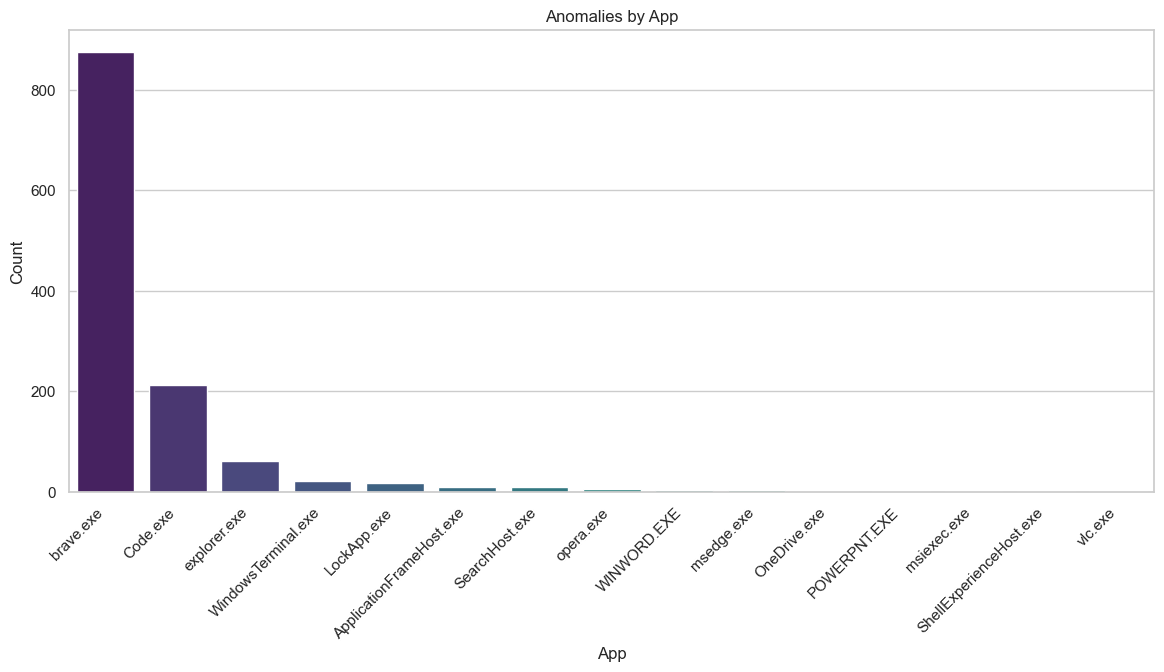

In [99]:

# Plot the occurrences of anomalies based on apps
plt.figure(figsize=(14, 6))
sns.countplot(x='app', data=anomalies, order=anomalies['app'].value_counts().index, palette='viridis')
plt.title('Anomalies by App')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##### The x-axis represents different applications, while the y-axis shows the count of anomalies associated with each app. This visualization helps in understanding which applications have a higher frequency of anomalies.